# <font color='orange'> Imports </font>

Most of my projects use the packages below. Often, I just copy and paste the cell below into my projects and add anything I eventually need extra.

In [ ]:
# Mount YOUR google drive. You'll need to "Add shortcut to Drive" for our shared folder for it to show up here.
# Use the URL shown below in the output to authorize this Colab session to access you GDrive
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

! pip install geopandas
! pip install geopy
! pip install -U plotly

import pandas as pd
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import geopy.distance
from shapely.geometry import Point, Polygon
import csv
import math
import numpy as np
import scipy 
from scipy import stats as sts
import plotly.express as px
from numpy.random import default_rng
from plotnine import *
import time
import matplotlib.pyplot as plt

rng = default_rng(13)

Mounted at /content/drive/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 44.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


# <font color='orange'> Data </font>

This example will use some data. You must tell the notebook where to look for these data. Here, I am telling that the data is in my google drive (/content/drive/MyDrive/) in a folder called 'Courses' in a subfolder called 'SYDE_599'. You can download the data for this example (i.e., the file Alameda.csv) from LEARN and save at your preferred location in your computer, you just need to point the notebook to where the data are.

In [ ]:
# Modify this according to the path in your computer
main_dir = '/content/drive/MyDrive/Courses/SYDE_599/'

In this homework we will work with data from a project of mine. This project involved the city of Alameda in the San Francisco Bay Area. The data in question regard the housing stock in the city. We will use this data to reinforce some Python programming skills.

In [ ]:
# pd.read_csv(path to file) reads the file in the provided path
df_Alameda = pd.read_csv(main_dir + 'Alameda.csv')

# Print the first (n) terms of the dataframe
df_Alameda.head(3)

# Notes
# UseCategory: the type of building 
# LandValue: the value of the lot
# ImprovementValue: the value of the building that was built on top of the land
# HomeValue = LandValue + HomeValue
# LatestDocument = year the building was last sold/changed ownership

,Latitude,Longitude,UseCategory,Buildings,Units,Stories,Rooms,Beds,YearBuilt,Baths,Area,LandValue,ImprovementValue,HomeValue,LatestDocument
0,37.756951,-122.237670,Single-family Detached,1,1,1,6,3,1900,1.0,1134,54029,12106,66135,1969
1,37.734668,-122.239088,Single-family Detached,1,1,1,6,4,1957,2.0,1196,34300,40577,74877,1969
2,37.734820,-122.233459,Single-family Detached,1,1,1,4,2,1952,1.0,1223,40353,40802,81155,1969


Here, I am plotting the location of each house in the city and the year they were built just to give you a better idea of what the data look like.
You can scroll in/out the map.

In [ ]:
# And plot a map with the data underneath
df_Alameda['YearBuilt'] = df_Alameda['YearBuilt'].apply(lambda x: 1900 if x < 1900 else x)
df_plt = df_Alameda.copy()
gdf_plt = gpd.GeoDataFrame(df_plt, geometry=gpd.points_from_xy(df_plt.Longitude, df_plt.Latitude), crs='epsg:4326')

fig = px.scatter_mapbox(gdf_plt, 
                        lat = gdf_plt['Latitude'],
                        lon = gdf_plt['Longitude'],
                        center={"lat": 37.760, "lon": -122.264},
                        mapbox_style="carto-positron",
                        color = 'YearBuilt', 
                        color_continuous_scale='Viridis',
                        zoom=12.2,
                        height=700,
                        width=800
                      )
fig.show()

# <font color='orange'> Task 1 - Data frames & loops </font>

Our data are stored in the data frame 'df_Alameda'. Here, you will create a new column in this data frame to calculate the ImprovementValue as a fraction of the HomeValue (i.e., ImprovementValue / HomeValue). 

## <font color='orange'> Task 1.a </font>

Do this by looping over each row of df_Alameda and storing the value into a new column named 'PercentValue'. 

In [ ]:
# Code here

# Code here
df_Alameda.head(3)

,Latitude,Longitude,UseCategory,Buildings,Units,Stories,Rooms,Beds,YearBuilt,Baths,Area,LandValue,ImprovementValue,HomeValue,LatestDocument,PercentValue
0,37.756951,-122.237670,Single-family Detached,1,1,1,6,3,1900,1.0,1134,54029,12106,66135,1969,0.183050
1,37.734668,-122.239088,Single-family Detached,1,1,1,6,4,1957,2.0,1196,34300,40577,74877,1969,0.541915
2,37.734820,-122.233459,Single-family Detached,1,1,1,4,2,1952,1.0,1223,40353,40802,81155,1969,0.502766


## <font color='orange'> Task 1.b </font>

Do this by dividing the columns (i.e., ImprovementValue/HomeValue) and storing the value into a new column named 'PercentValue'. 

In [ ]:
# Code here 

# Code here
df_Alameda.head(3)

,Latitude,Longitude,UseCategory,Buildings,Units,Stories,Rooms,Beds,YearBuilt,Baths,Area,LandValue,ImprovementValue,HomeValue,LatestDocument,PercentValue,PercentValue_b
0,37.756951,-122.237670,Single-family Detached,1,1,1,6,3,1900,1.0,1134,54029,12106,66135,1969,0.183050,0.183050
1,37.734668,-122.239088,Single-family Detached,1,1,1,6,4,1957,2.0,1196,34300,40577,74877,1969,0.541915,0.541915
2,37.734820,-122.233459,Single-family Detached,1,1,1,4,2,1952,1.0,1223,40353,40802,81155,1969,0.502766,0.502766


## <font color='orange'> Task 1.c </font>

Do this by creating a new _list_ that receives the value of ImprovementValue/HomeValue. Then add this list a column of the data frame.

In [ ]:
# Code here


# Code here
df_Alameda.head(3)

,Latitude,Longitude,UseCategory,Buildings,Units,Stories,Rooms,Beds,YearBuilt,Baths,Area,LandValue,ImprovementValue,HomeValue,LatestDocument,PercentValue,PercentValue_b,PercentValue_c
0,37.756951,-122.237670,Single-family Detached,1,1,1,6,3,1900,1.0,1134,54029,12106,66135,1969,0.183050,0.183050,0.183050
1,37.734668,-122.239088,Single-family Detached,1,1,1,6,4,1957,2.0,1196,34300,40577,74877,1969,0.541915,0.541915,0.541915
2,37.734820,-122.233459,Single-family Detached,1,1,1,4,2,1952,1.0,1223,40353,40802,81155,1969,0.502766,0.502766,0.502766


# <font color='orange'> Task 2 - Data frames & functions </font>
 
The column 'Area' is in squared feet. Create a new column named 'Area_m2' that will store the area of each home in squared metres. 

1 squared metre = 10.7639 squared feet

## <font color='orange'> Task 2.a </font>

Do this by looping over the rows and applying the conversion of units.

In [ ]:
# Code here


# Code here
df_Alameda.head(3)

,Latitude,Longitude,UseCategory,Buildings,Units,Stories,Rooms,Beds,YearBuilt,Baths,Area,LandValue,ImprovementValue,HomeValue,LatestDocument,PercentValue,PercentValue_b,PercentValue_c,Area_m2
0,37.756951,-122.237670,Single-family Detached,1,1,1,6,3,1900,1.0,1134,54029,12106,66135,1969,0.183050,0.183050,0.183050,105.352149
1,37.734668,-122.239088,Single-family Detached,1,1,1,6,4,1957,2.0,1196,34300,40577,74877,1969,0.541915,0.541915,0.541915,111.112143
2,37.734820,-122.233459,Single-family Detached,1,1,1,4,2,1952,1.0,1223,40353,40802,81155,1969,0.502766,0.502766,0.502766,113.620528


## <font color='orange'> Task 2.b </font>

Do this by dividing/multiplying the column Area.

In [ ]:
# Code here

# Code here
df_Alameda.head(3)

,Latitude,Longitude,UseCategory,Buildings,Units,Stories,Rooms,Beds,YearBuilt,Baths,Area,LandValue,ImprovementValue,HomeValue,LatestDocument,PercentValue,PercentValue_b,PercentValue_c,Area_m2,Area_m2_b
0,37.756951,-122.237670,Single-family Detached,1,1,1,6,3,1900,1.0,1134,54029,12106,66135,1969,0.183050,0.183050,0.183050,105.352149,105.352149
1,37.734668,-122.239088,Single-family Detached,1,1,1,6,4,1957,2.0,1196,34300,40577,74877,1969,0.541915,0.541915,0.541915,111.112143,111.112143
2,37.734820,-122.233459,Single-family Detached,1,1,1,4,2,1952,1.0,1223,40353,40802,81155,1969,0.502766,0.502766,0.502766,113.620528,113.620528


## <font color='orange'> Task 2.c </font>

Do this by applying a lambda function to the column Area.

In [ ]:
# Code here

# Code here
df_Alameda.head(3)

,Latitude,Longitude,UseCategory,Buildings,Units,Stories,Rooms,Beds,YearBuilt,Baths,...,LandValue,ImprovementValue,HomeValue,LatestDocument,PercentValue,PercentValue_b,PercentValue_c,Area_m2,Area_m2_b,Area_m2_c
0,37.756951,-122.237670,Single-family Detached,1,1,1,6,3,1900,1.0,...,54029,12106,66135,1969,0.183050,0.183050,0.183050,105.352149,105.352149,105.352149
1,37.734668,-122.239088,Single-family Detached,1,1,1,6,4,1957,2.0,...,34300,40577,74877,1969,0.541915,0.541915,0.541915,111.112143,111.112143,111.112143
2,37.734820,-122.233459,Single-family Detached,1,1,1,4,2,1952,1.0,...,40353,40802,81155,1969,0.502766,0.502766,0.502766,113.620528,113.620528,113.620528


# <font color='orange'> Task 3 - Data frames & selection </font>

Here, we will practice slicing. Say you want to buy a home whose value is below $500,000, has *at least* 2 baths, *exactly* 3 bedrooms, and was built after 1960.

Create a new data frame named df_Alameda_Selected that contains only the homes that fit your criteria. 

Note, the indexes in your new data frame will not be correct unless you take one extra step to fix them.

Tip: check the 'Slicing' section of the Python tutorial.

In [ ]:
# Code here


# Code here
df_Alameda_Selected.head(3)

,Latitude,Longitude,UseCategory,Buildings,Units,Stories,Rooms,Beds,YearBuilt,Baths,...,LandValue,ImprovementValue,HomeValue,LatestDocument,PercentValue,PercentValue_b,PercentValue_c,Area_m2,Area_m2_b,Area_m2_c
0,37.751862,-122.239930,Single-family Detached,1,1,2,6,3,1971,2.0,...,37663,86087,123750,1973,0.695653,0.695653,0.695653,177.352075,177.352075,177.352075
1,37.730908,-122.235745,Townhouse,1,1,2,5,3,1974,2.5,...,11648,71430,83078,1975,0.859794,0.859794,0.859794,152.546939,152.546939,152.546939
2,37.759147,-122.256874,Single-family Detached,1,1,1,6,3,1962,2.0,...,49096,59633,108729,1975,0.548455,0.548455,0.548455,137.868245,137.868245,137.868245


Extra: you can plot the buildings that fit your criteria to see that much fewer do so.

In [ ]:
# And plot a map with the data underneath
df_plt = df_Alameda_Selected.copy() # !!! This code assumes you named the new data frame 'df_Alameda_Selected' (case sensitive)

gdf_plt = gpd.GeoDataFrame(df_plt, geometry=gpd.points_from_xy(df_plt.Longitude, df_plt.Latitude), crs='epsg:4326')

fig = px.scatter_mapbox(gdf_plt, 
                        lat = gdf_plt['Latitude'],
                        lon = gdf_plt['Longitude'],
                        center={"lat": 37.760, "lon": -122.264},
                        mapbox_style="carto-positron",
                        color = 'YearBuilt', 
                        color_continuous_scale='Viridis',
                        zoom=12.2,
                        height=700,
                        width=800
                      )
fig.show()

# <font color='orange'> Task 4 - Plots </font>

This task will guide you through creating plots using plotnine.

## <font color='orange'> Task 4.1 - Histogram </font>

Go [to this page](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_histogram.html) to read the documentation for plotnine's histogram plot. Read the documentation and examples.

Now, create a histogram plot with *20 bins* of the YearBuilt variable for _all_ buildings in df_Alameda.

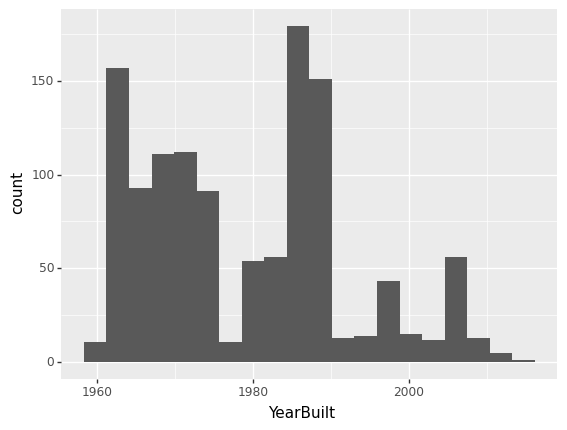

<ggplot: (8746230443258)>

In [ ]:
# Your could will look something like this with some extra variables
# ggplot(df_Alameda) + geom_histogram()

## <font color='orange'> Task 4.2 - Line + points </font>

Go to this page to learn about [line plots](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_line.html) and here [for scatter plots](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_point.html).

Now, create a line + scatter plot with YearBuilt on the X-axis and HomeValue on the Y-axis.

The plot should only contain the *first 100 rows of df_Alameda*.

The line plot should use a *red dashed line*.

The scatter plot should use *blue dots of size 2*.

Tip: your code will look something like this:
 `ggplot('something) + geom_line('something) + geom_point(something)`

## <font color='orange'> Task 4.3 - Making plots look nicer </font>

Using the example in the tutorial, change the axis titles, axis limits, and legend titles to better represent the data - how you do it is up to you. Change the scatter plot (i.e., geom_point()) from blue dots to dots  coloured using a scale based on the HomeValue.

# <font color='orange'> Task 4 - Random numbers </font>

## <font color='orange'> Task 4.1 </font>

Revisit the Tutorial section on 'Random numbers following a multinomial distribution'. 

Now, simulate 1000 rolls of a six-sided fair dice. Plot the outcomes as a histogram.

Tips: a fair dice has the same chance (i.e., 1/6) for each face (i.e., 1-6).
Thus, a fair dice can be modelled as a multinomial distribution with six alternative outcomes each with probability 1/6.

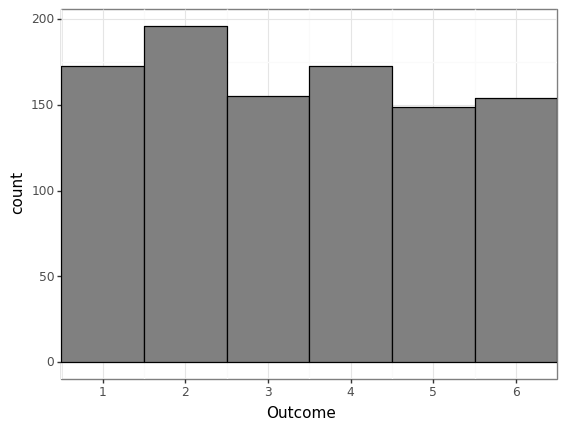

<ggplot: (8746224209902)>

In [ ]:
# code here

## <font color='orange'> Task 4.2 </font>

A survey at UW asked many students their height. The outcomes of the survey indicated that student height is *normally* distributed with mean=170 cm, and standard deviation=10 cm. Using a random number generator, calculate the probability that if you ask a random colleague of yours, they height will be less than 180 cm.

Tips: generate a large sample of normally distributed random numbers with distribution given by the parameters above. Store these data in a data frame, then slice it to identify how many are below 180cm. Divide that number by the total number of simulations you create (or the number of rows in the data frame). (This is not the only way to solve this problem but it will help you get familiar with some aspects of simulations).

/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:401: PlotnineWarning:

geom_histogram : Removed 2 rows containing missing values.



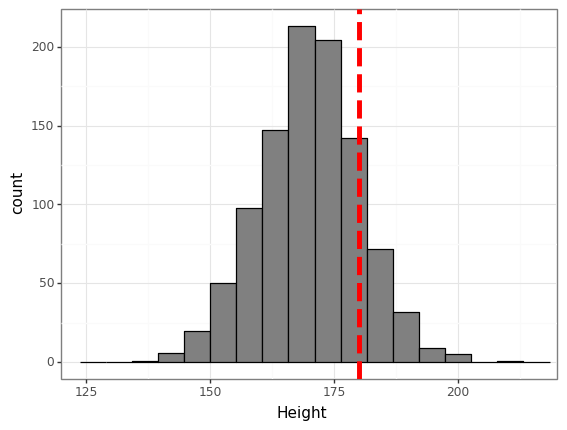

<ggplot: (8746225175077)>

In [ ]:
# Important: to guarantee you will always get the same results, re-start your random number generator here with a fixed seed, e.g.,
rng = default_rng(13)

# code here